In [3]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# from mpl_toolkits.basemap import Basemap

#Carregar

In [2]:
#Carregar
with open('results_dictionary.pkl', 'rb') as f:
    results = pickle.load(f)

In [10]:
# # Para cada fold, mostrar métricas de desempenho
# for model in ['model1', 'model2', 'model3']:
#     for opt in ['Adam', 'RMSprop', 'SGD', 'Adagrad']:
#         print(f"\n{model} - {opt}:")
#         print(f"MAE por fold: {results[model][opt]['MAE']}")

In [4]:
# Criar tabela com médias e desvios para cada combinação
summary_table = pd.DataFrame(columns=['Arquitetura', 'Otimizador', 'MAE', 'MSE', 'RMSE'])
rows = []

for model in ['model1', 'model2', 'model3']:
    for opt in ['Adam', 'RMSprop', 'SGD', 'Adagrad']:
        mae_mean = np.mean(results[model][opt]['MAE'])
        mae_std = np.std(results[model][opt]['MAE'])
        mse_mean = np.mean(results[model][opt]['MSE'])
        mse_std = np.std(results[model][opt]['MSE'])
        rmse_mean = np.mean(results[model][opt]['RMSE'])
        rmse_std = np.std(results[model][opt]['RMSE'])
        
        rows.append({
            'Arquitetura': model,
            'Otimizador': opt,
            'MAE': f"{mae_mean:.4f} ± {mae_std:.4f}",
            'MSE': f"{mse_mean:.4f} ± {mse_std:.4f}",
            'RMSE': f"{rmse_mean:.4f} ± {rmse_std:.4f}"
        })

summary_table = pd.DataFrame(rows)

# Exibir a tabela
print("\nResultados por Modelo e Otimizador:")
summary_table

# Opcionalmente, salvar como CSV ou Excel
# summary_table.to_csv('resultados_comparativos.csv', index=False)


Resultados por Modelo e Otimizador:


,Arquitetura,Otimizador,MAE,MSE,RMSE
0,model1,Adam,0.7719 ± 0.2631,7.3337 ± 12.9877,1.8633 ± 1.9652
1,model1,RMSprop,0.4590 ± 0.1539,4.0585 ± 7.6131,1.2778 ± 1.5574
2,model1,SGD,0.3973 ± 0.0549,1.2067 ± 1.9411,0.8386 ± 0.7095
3,model1,Adagrad,23.4123 ± 0.7222,554.4564 ± 32.1190,23.5369 ± 0.6875
4,model2,Adam,0.5356 ± 0.1084,2.9377 ± 4.9714,1.2448 ± 1.1783
5,model2,RMSprop,0.4713 ± 0.1029,4.1476 ± 7.6998,1.3196 ± 1.5512
6,model2,SGD,0.4140 ± 0.0669,1.4711 ± 2.4392,0.9031 ± 0.8096
7,model2,Adagrad,11.3584 ± 3.9989,172.1755 ± 90.3528,12.4604 ± 4.1127
8,model3,Adam,0.4914 ± 0.1511,5.0772 ± 9.5329,1.4244 ± 1.7459
9,model3,RMSprop,0.5860 ± 0.1056,2.3317 ± 3.6350,1.1871 ± 0.9605


In [13]:
# Realizar teste de Friedman diretamente dos resultados
def analyze_friedman(results_dict):
    friedman_results = []
    
    for model in ['model1', 'model2', 'model3']:
        # Coletar dados MAE para cada otimizador
        optimizer_data = [results_dict[model][opt]['MAE'] 
                         for opt in ['Adam', 'RMSprop', 'SGD', 'Adagrad']]
        
        # Realizar teste de Friedman
        statistic, p_value = stats.friedmanchisquare(*optimizer_data)
        
        # Armazenar resultados
        friedman_results.append({
            'Modelo': model,
            'Estatística': f"{statistic:.4f}",
            'p-valor': f"{p_value:.7f}",
            'Significativo': 'Sim' if p_value < 0.05 else 'Não'
        })
    
    return pd.DataFrame(friedman_results)
    
friedman_results = analyze_friedman(results)

# Exibir resultados
print("\nResultados do Teste de Friedman por Modelo (MAE):")
print("=" * 45)
for _, row in friedman_results.iterrows():
    print(f"\nModelo: {row['Modelo']}")
    print(f"Estatística: {row['Estatística']}")
    print(f"p-valor: {row['p-valor']}")
    print(f"Diferença Significativa: {row['Significativo']}")


Resultados do Teste de Friedman por Modelo (MAE):

Modelo: model1
Estatística: 14.0400
p-valor: 0.0028512
Diferença Significativa: Sim

Modelo: model2
Estatística: 12.1200
p-valor: 0.0069832
Diferença Significativa: Sim

Modelo: model3
Estatística: 9.9600
p-valor: 0.0189092
Diferença Significativa: Sim


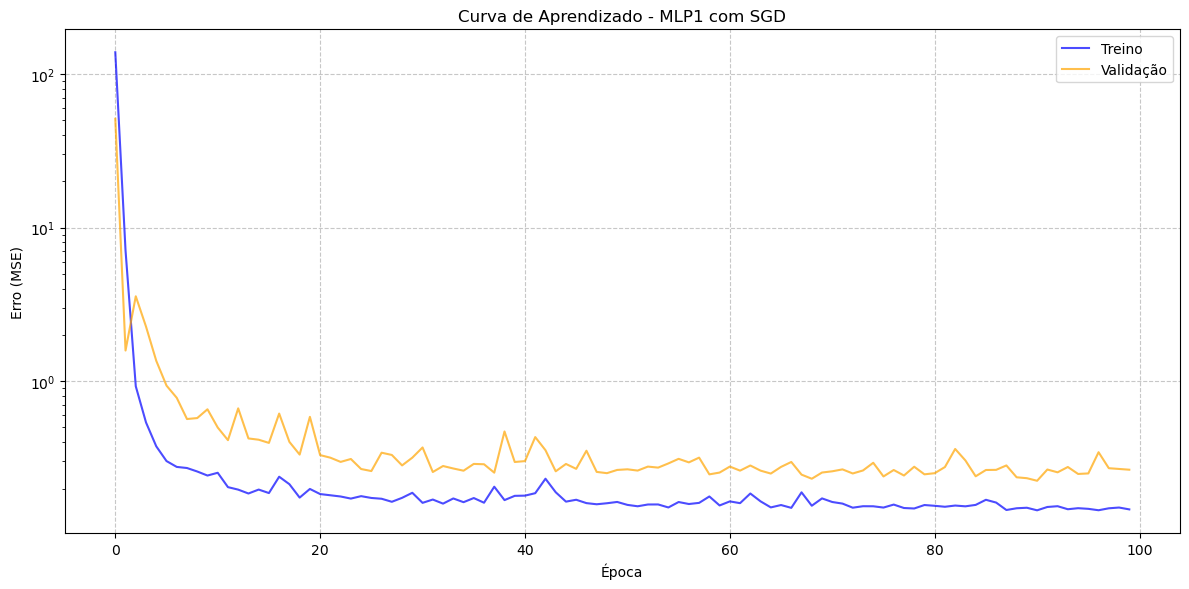


Estatísticas do Treinamento:
Menor erro de treino: 0.1443
Menor erro de validação: 0.2247
Época com menor erro de validação: 91


In [9]:
# Carregar o histórico do melhor modelo (MLP1 com SGD)
history = results['model1']['SGD']['history']

# Plotar curva de aprendizado
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Treino', color='blue', alpha=0.7)
plt.plot(history['val_loss'], label='Validação', color='orange', alpha=0.7)
plt.title('Curva de Aprendizado - MLP1 com SGD', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Erro (MSE)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.yscale('log')  # Usar escala logarítmica para melhor visualização
plt.tight_layout()

# Opcionalmente, salvar a figura
# plt.savefig('learning_curve_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

# Imprimir algumas estatísticas do treinamento
print("\nEstatísticas do Treinamento:")
print(f"Menor erro de treino: {min(history['loss']):.4f}")
print(f"Menor erro de validação: {min(history['val_loss']):.4f}")
print(f"Época com menor erro de validação: {np.argmin(history['val_loss']) + 1}")